   Credit_Score  Annual_Income  Loan_Amount  Debt_to_Income_Ratio  \
0           402         126296        27473              0.250419   
1           735         101182        33625              0.689754   
2           570         102565        20504              0.992568   
3           406          49402        29089              0.165404   
4           371          24263        41487              0.169370   

   Number_of_Accounts  Late_Payments  Loan_Approved  
0                  16              0              1  
1                   5              0              1  
2                  17              0              1  
3                  10              4              0  
4                  18              9              0  
Missing values:
Credit_Score            0
Annual_Income           0
Loan_Amount             0
Debt_to_Income_Ratio    0
Number_of_Accounts      0
Late_Payments           0
Loan_Approved           0
dtype: int64
       Credit_Score  Annual_Income   Loan_Amount  

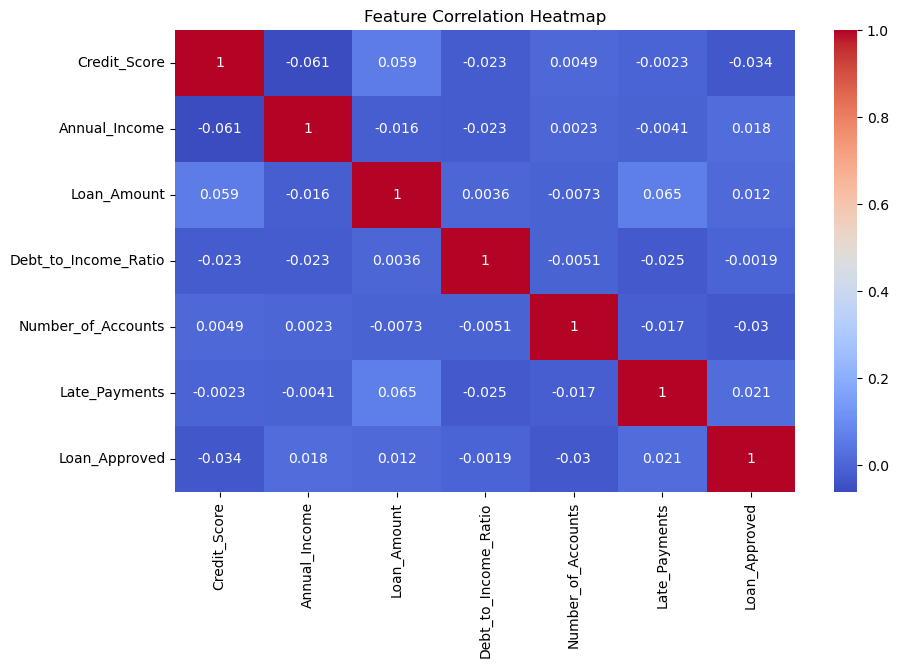

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Load the dataset
dataset_path = 'Support Vector Machines.csv'  # Ensure the correct dataset path
df = pd.read_csv(dataset_path)

# Display first five rows
print(df.head())

# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Identify target column
target_column = None
for col in df.columns:
    if df[col].nunique() == 2:  # Assuming binary classification
        target_column = col
        break

if target_column is None:
    print("Error: No binary target column found in dataset. Available columns:", df.columns)
    raise ValueError("Target column not found. Please check the dataset.")

# Splitting dataset into features and target
X = df.drop(columns=[target_column])
y = df[target_column]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an SVM Classifier with a Linear Kernel
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)
print("SVM (Linear Kernel) Accuracy:", accuracy_score(y_test, y_pred_linear))

# Train an SVM Classifier with a Polynomial Kernel
svm_poly = SVC(kernel='poly', degree=3, C=1.0, random_state=42)
svm_poly.fit(X_train, y_train)
y_pred_poly = svm_poly.predict(X_test)
print("SVM (Polynomial Kernel) Accuracy:", accuracy_score(y_test, y_pred_poly))

# Train an SVM Classifier with an RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)
print("SVM (RBF Kernel) Accuracy:", accuracy_score(y_test, y_pred_rbf))

# Hyperparameter Tuning using GridSearchCV
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf'],
    'gamma': ['scale', 'auto']
}
grid_search = GridSearchCV(SVC(), param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best SVM model
y_pred_best = grid_search.best_estimator_.predict(X_test)
print("Best SVM Parameters:", grid_search.best_params_)
print("Best SVM Accuracy:", accuracy_score(y_test, y_pred_best))

# Model Comparison
models = ['Linear SVM', 'Polynomial SVM', 'RBF SVM', 'Best SVM']
accuracies = [accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_poly), accuracy_score(y_test, y_pred_rbf), accuracy_score(y_test, y_pred_best)]

plt.figure(figsize=(10,6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('SVM Model Performance Comparison')
plt.xticks(rotation=30)
plt.show()